# Part I - Airline delay prediction - Data Wrangling
## by Juanita Smith

## Introduction
Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is our chance to find out.

This analysis will be focused on predicting flight delays or cancellations.

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).
> - See more information from the data expo challenge in 2009 [here](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009).
> - See a full description of the features [here](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D.)
> - Data can be downloaded from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7).

Dictionary:
1) Year 1987-2008 
2) Month 1-12 
3) DayofMonth 1-31 
4) DayOfWeek 1 (Monday) - 7 (Sunday) 
5) DepTime actual departure time (local, hhmm) 
6) CRSDepTime scheduled departure time (local, hhmm) 
7) ArrTime actual arrival time (local, hhmm) 
8) CRSArrTime scheduled arrival time (local, hhmm) 
9) UniqueCarrier unique carrier code 
10) FlightNum flight number 
11) TailNum plane tail number 
12) ActualElapsedTime in minutes 
13) CRSElapsedTime in minutes 
14) AirTime in minutes 
15) ArrDelay arrival delay, in minutes 
16) DepDelay departure delay, in minutes 
17) Origin origin IATA airport code 
18) Destination IATA airport code 
19) Distance in miles 
20) TaxiIn - The time elapsed between wheels down and arrival at the destination airport gate in minutes
21) TaxiOut - The time elapsed between departure from the origin airport gate and wheels off in minutes
22) Cancelled was the flight cancelled? 
23) CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24) Diverted 1 = yes, 0 = no 
25) CarrierDelay in minutes
26) WeatherDelay in minutes 
27) NASDelay in minutes 
28) SecurityDelay in minutes 
29) LateAircraftDelay in minutes


**Important to note:** According to the documentation, a late flight is defined as a flight arriving or departing 15 minutes or more after the scheduled time.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  





In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import glob

# clear the garbage to free memory as we are working with huge datasets
import gc 

# import warnings
# warnings.filterwarnings("ignore")

# Import custom modules
from src.utils import reduce_mem_usage, create_folder, convert_time

# set plots to be embedded inline
%matplotlib inline

# suppress matplotlib user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# use high resolution if this project is run on an apple device
%config InlineBackend.figure_format='retina'

# Make your Jupyter Notebook wider
from IPython.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

# environment settings
# display all columns and rows during visual inspection
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# stop scientific notation on graphs
pd.options.display.float_format = '{:.0f}'.format

In [2]:
sns.set_style("whitegrid")
BASE_COLOR = sns.color_palette()[0]

In [3]:
FILE_NAME_RAW = '../data/flights_raw.pkl'
FILE_NAME_CLEAN = '../data/flights_clean.pkl'

<span style="color:blue; font-size:30px; line-height:40px; font-family: Calibri;">Data Wrangling</span>

<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">Step 1: Data Gathering</span>

Compressed data in format 'bz2' was downloaded in bulk from above link, one file per year from 1987 - 2008. Uncompress each file, and merge the data into one big dataframe.
Due to data size, only read the last 5 years of data

In [4]:
# # get the last 6 years of saved archived data files available from 1987 - 2008

# start_time = time.time()

# # Get CSV files list from a folder
# path = '../data/dataverse_files'
# csv_files = glob.glob(path + "/*.csv.bz2")
# csv_files.sort()

# # get last 5 years of data
# flights = pd.concat((pd.read_csv(f, compression='bz2', encoding='iso-8859-1') for f in csv_files[-6:]))
# flights.reset_index(inplace=True, drop=True)

# end_time = time.time()
# print('Executing time: {} min'.format((end_time - start_time)/60))

In [5]:
# flights.head(3)

In [6]:
# First, as this is a large dataset, lets reduce the memory of the dataset to make further analysis easier
# flights = reduce_mem_usage(flights)

In [7]:
# save the consolidated raw file 
# flights.to_pickle(FILE_NAME_RAW)

<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">Step 2: Assessing</span>

In [8]:
# # load the consolidated raw file
flights = pd.read_pickle(FILE_NAME_RAW)

In [9]:
# visual inspection using a sample
flights.sample(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
16583430,2005,5,19,4,542,550,801,811,DL,1581,N316DL,139,141,116,-10,-8,BOS,CVG,752,6,17,0,NaN,0,0,0,0,0,0
15021160,2005,3,12,6,627,630,746,746,XE,3241,N11539,79,76,56,0,-3,BUF,EWR,282,7,16,0,NaN,0,0,0,0,0,0
2935000,2003,6,5,4,1608,1555,2140,2136,UA,588,N819UA,211,221,195,3,13,LAX,MSY,1671,4,12,0,NaN,0,0,0,0,0,0
13319090,2004,12,19,7,730,730,828,836,DL,416,N3740C,58,66,44,-8,0,TLH,ATL,223,6,8,0,NaN,0,0,0,0,0,0
16185034,2005,5,2,1,1925,1930,2052,2100,OO,6579,N979SW,86,90,69,-9,-5,TUS,LAX,451,9,8,0,NaN,0,0,0,0,0,0
37379640,2008,4,10,4,706,712,1124,1046,UA,702,N309UA,198,154,140,38,-6,OAK,DEN,957,49,9,0,NaN,0,0,0,38,0,0
26531624,2006,10,31,2,1143,1150,1256,1248,NW,1161,N940N,73,58,47,8,-7,BHM,MEM,211,6,20,0,NaN,0,0,0,0,0,0
26006823,2006,9,7,4,1023,1008,1303,1238,AS,281,N797AS,160,150,138,25,15,LAX,SEA,954,8,14,0,NaN,0,0,0,10,0,15
12333844,2004,10,5,2,1758,1800,2132,2200,AS,131,N629AS,393,420,366,-29,-2,ORD,ANC,2846,6,21,0,NaN,0,0,0,0,0,0
30512515,2007,5,21,1,600,600,704,710,OH,5615,N709CA,64,70,46,-6,0,TYS,CVG,226,3,15,0,NaN,0,0,0,0,0,0


>**Observations from visual inspection:**

    - All time columns `DepTime, CRSDepTime, ArrTime, CRSArrTime with format hhmm, was converted to a number, dropping leading zero's
    - `Year, month, DayOfMonth` together make up a date field which can be used for time series investigations, to be considered during feature engineering
    - Column `Cancelled` looks like it could be a boolean field
    - ArrDelay and DepDelay sometimes have negative numbers, I assume these are not delays but early departures and arrivals - to be further investigated
    - Looks like the reason for delay features at the end of the dataset, represent a breakdown of the total delay in arrivals (ArrDelay) - to be further investigated
    - Column headings start with a capital letter
    - When `CancellationCode` is 0, means flight was not cancelled, we see NaN as value in CancellationCode. It's not missing as such, but rather an indication of a cancelled flight

#### What is the structure of the dataset?

In [10]:
flights.shape

(37742760, 29)

#### Inspect the data types and missing values

In [11]:
flights.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37742760 entries, 0 to 37742759
Data columns (total 29 columns):
 #   Column             Non-Null Count     Dtype  
---  ------             --------------     -----  
 0   Year               37742760 non-null  int16  
 1   Month              37742760 non-null  int8   
 2   DayofMonth         37742760 non-null  int8   
 3   DayOfWeek          37742760 non-null  int8   
 4   DepTime            37032680 non-null  float16
 5   CRSDepTime         37742760 non-null  int16  
 6   ArrTime            36954468 non-null  float16
 7   CRSArrTime         37742760 non-null  int16  
 8   UniqueCarrier      37742760 non-null  object 
 9   FlightNum          37742760 non-null  int16  
 10  TailNum            37673823 non-null  object 
 11  ActualElapsedTime  36954467 non-null  float16
 12  CRSElapsedTime     37741354 non-null  float16
 13  AirTime            36954468 non-null  float16
 14  ArrDelay           36954467 non-null  float16
 15  DepDelay     

**Observation from info():**

- DepTime, CRSDepTime, ArrTime and CRSArrTime have incorrect integer or float data times, it should be datetime.time with format hhmm
- Reason for delay features (Carrier_Delay, WeatherDelay, NASDelay, SecurityDelay and LateAirCraftDelay) can be converted from float to integer to save memory space

In [12]:
# for further programmatic inspection take a sample to avoid performance issues, as we are working with a large dataset > 2GB
sample = np.random.choice(flights.shape[0], 500000, replace=False)
flight_sample = flights.loc[sample,:].copy()
flight_sample.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
30866018,2007,5,30,3,NaN,1520,NaN,1700,AA,1344,0,NaN,100,NaN,NaN,NaN,DFW,OMA,583,0,0,1,C,0,0,0,0,0,0
24292416,2006,7,12,3,1055,1055,1150,1155,WN,2968,N385SW,55,60,43,-5,0,STL,MDW,251,5,7,0,NaN,0,0,0,0,0,0
9570227,2004,6,23,3,614,615,802,801,NW,1693,N367NB,108,106,89,1,-1,RDU,DTW,501,8,11,0,NaN,0,0,0,0,0,0
4804730,2003,9,24,3,1528,1530,1610,1621,CO,889,N38257,42,51,27,-11,-2,IAH,AUS,140,4,11,0,NaN,0,0,0,0,0,0
30165843,2007,4,24,2,1118,1119,1207,1220,NW,611,N357NW,169,181,154,-13,-1,MSP,GEG,1175,5,10,0,NaN,0,0,0,0,0,0


### Missing data
How much missing data do we have in columns and rows ?

#### Missing data in columns

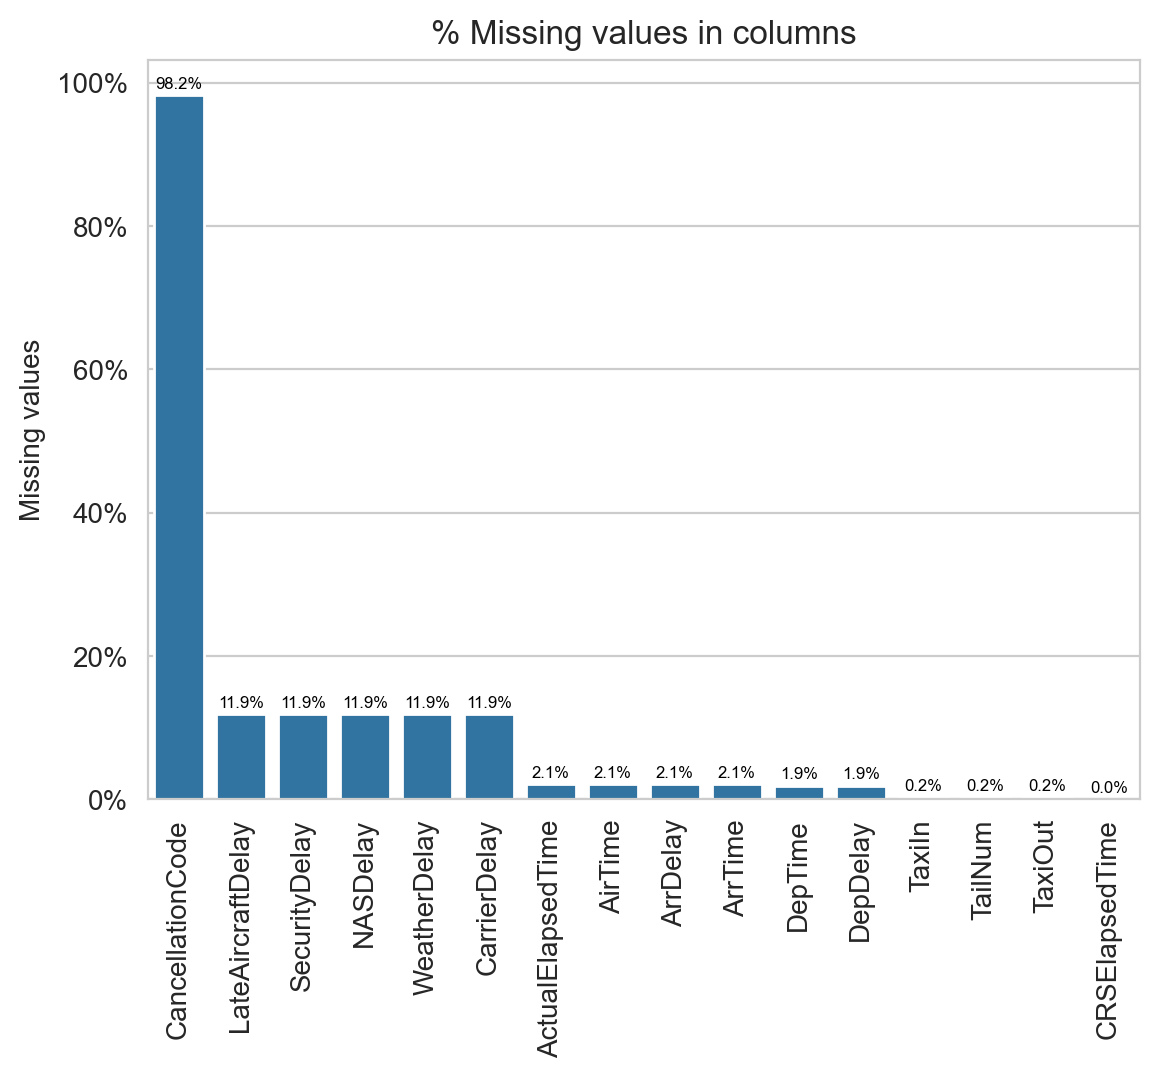

In [13]:
# Display columns with missing values
na_counts = flight_sample.isna().sum().sort_values(ascending=False) 

# Drop columns with no missing values
na_counts = na_counts[na_counts > 0]

sns.barplot(x=na_counts.index.values, y=na_counts/flight_sample.shape[0]*100, color=BASE_COLOR)
plt.xticks(rotation=90)
yticks = np.arange(0, 101, 20)
ylabels = ['{}%'.format(v) for v in yticks]
plt.ylabel('Missing values')
plt.title('% Missing values in columns')
plt.yticks(yticks, ylabels)

# get current tick locations and labels
locs, labels = plt.xticks()

# for each bar, print a % text at the top of each bar
for loc, label in zip(locs,labels):
    count = na_counts[label.get_text()]/flight_sample.shape[0]*100
    pct_string = '{:0.1f}%'.format(count)
    plt.text(loc, count+1, pct_string, ha='center', color='black', fontsize=6)

plt.show()
# plt.ticklabel_format(style='plain', axis='y')

In [14]:
# Take a closer look at records where features like 'AirTime' is missing. It looks like when AirTime is missing, ArrDelay, ArrTime, DepTime and DepDelay could also be missing
flight_sample.loc[flight_sample['AirTime'].isna()][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
30866018,2007,5,30,3,NaN,1520,NaN,1700,AA,1344,0,NaN,100,NaN,NaN,NaN,DFW,OMA,583,0,0,1,C,0,0,0,0,0,0
13263935,2004,12,24,5,NaN,1800,NaN,1910,XE,3205,0,NaN,70,NaN,NaN,NaN,IAH,HRL,295,0,0,1,B,0,0,0,0,0,0
14131371,2005,1,15,6,NaN,1433,NaN,1647,AS,522,000000,NaN,134,NaN,NaN,NaN,PDX,PSP,873,0,0,1,B,0,0,0,0,0,0
15976674,2005,5,16,1,NaN,1105,NaN,1354,UA,610,000000,NaN,109,NaN,NaN,NaN,ORD,DCA,612,0,0,1,A,0,0,0,0,0,0
20588228,2005,12,5,1,NaN,1939,NaN,2153,MQ,4329,0,NaN,74,NaN,NaN,NaN,ORD,SDF,286,0,0,1,A,0,0,0,0,0,0
32261885,2007,8,5,7,1739,1645,NaN,2010,WN,813,N763SW,NaN,145,NaN,NaN,54,MDW,PHL,668,0,11,0,NaN,1,0,0,0,0,0
31059516,2007,6,28,4,NaN,635,NaN,905,WN,268,0,NaN,150,NaN,NaN,NaN,MDW,HOU,937,0,0,1,A,0,0,0,0,0,0
3192137,2003,6,12,4,NaN,1805,NaN,1939,DH,7817,N301UE,NaN,94,NaN,NaN,NaN,JFK,IAD,228,0,0,1,B,0,0,0,0,0,0
6954058,2004,1,26,1,NaN,1744,NaN,2044,AA,1242,0,NaN,120,NaN,NaN,NaN,ORD,PHL,678,0,0,1,B,0,0,0,0,0,0
1426996,2003,3,9,7,NaN,1651,NaN,17,HP,257,N642AW,NaN,266,NaN,NaN,NaN,LAS,PHL,2176,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN


**Observations missing values in Columns:**

- When AirTime is missing, the flight seems to be always cancelled. Is this the case for 'Diverted' flights also ?
- When a flight is NOT cancelled, CancellationCode is NaN. It's not really a missing value, it's just that the flight is not cancelled.

In [15]:
# Is airtime, and related columns also missing when a flight is diverted?
flight_sample.loc[flight_sample['Diverted'] == 1][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
32261885,2007,8,5,7,1739,1645,NaN,2010,WN,813,N763SW,NaN,145,NaN,NaN,54,MDW,PHL,668,0,11,0,NaN,1,0,0,0,0,0
19435336,2005,10,14,5,2120,2124,NaN,2356,MQ,4082,N664MS,NaN,92,NaN,NaN,-3,ORD,ROC,528,0,24,0,NaN,1,0,0,0,0,0
35078823,2007,12,28,5,645,645,NaN,1012,EV,4542,N901EV,NaN,147,NaN,NaN,0,MFE,ATL,974,0,15,0,NaN,1,0,0,0,0,0
5380530,2003,10,8,3,748,755,NaN,1049,DH,7630,N643BR,NaN,114,NaN,NaN,0,ORD,MDT,594,0,15,0,NaN,1,0,0,0,0,0
19975367,2005,11,15,2,1739,1729,NaN,1745,HP,186,N908AW,NaN,76,NaN,NaN,10,PHX,SAN,304,0,24,0,NaN,1,0,0,0,0,0
31006810,2007,6,12,2,1629,1520,NaN,1625,WN,398,N329SW,NaN,65,NaN,NaN,69,ISP,BWI,220,0,10,0,NaN,1,0,0,0,0,0
35358123,2008,1,4,5,1721,1605,NaN,1655,WN,985,N613SW,NaN,50,NaN,NaN,76,OAK,RNO,180,NaN,9,0,NaN,1,NaN,NaN,NaN,NaN,NaN
7242377,2004,2,6,5,1056,930,NaN,1137,OH,5329,N498CA,NaN,127,NaN,NaN,86,ATL,AVP,714,0,41,0,NaN,1,0,0,0,0,0
24816669,2006,7,21,5,909,900,NaN,1224,CO,238,N69311,NaN,204,NaN,NaN,9,EWR,MIA,1086,0,50,0,NaN,1,0,0,0,0,0
22771628,2006,4,29,6,1723,1727,NaN,2013,DL,1758,N382DA,NaN,286,NaN,NaN,-4,ATL,BOI,1838,0,15,0,NaN,1,0,0,0,0,0


In [16]:
# Is AirTime only missing when a flight is cancelled or diverted? Make there are not other missing errors
flights.loc[(flights['AirTime'].isna()) & (flights['Cancelled'] == 0) & (flights['Diverted'] == 0)][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [17]:
# Is DepDelay only missing when a flight is cancelled or diverted? Make there are not other missing errors
flights.loc[(flights['DepDelay'].isna()) & (flights['Cancelled'] == 0) & (flights['Diverted'] == 0)][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [18]:
# Is ArrDelay only missing when a flight is cancelled or diverted? Make there are not other missing errors
flights.loc[(flights['ArrDelay'].isna()) & (flights['Cancelled'] == 0) & (flights['Diverted'] == 0)][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1793766,2003,4,5,6,135,1945,439,2316,OO,3993,N452SW,NaN,151,304,NaN,0,DFW,DAB,981,5,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**Observations missing values in Columns:**

    - When 'AirTime', 'ArrTime', 'ActualElapsedTime', 'DepTime', 'ArrDelay', 'DepDelay' is missing, the flight is always cancelled or diverted, except for 1 record

#### Missing data in rows

In [19]:
# missing data in rows 
missing_data_in_rows = (flight_sample.isna().mean(axis=1) * 100).sort_values()
missing_data_in_rows.describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

count   500000
mean         6
std          6
min          0
25%          3
50%          3
75%          3
85%          3
90%         21
95%         21
99%         21
max         48
dtype: float64

In [20]:
# Investigate deeper the rows with missing values > 20%
missing_data_in_rows = missing_data_in_rows.loc[(missing_data_in_rows > 20)]
flight_sample.loc[missing_data_in_rows.index][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
36422440,2008,2,27,3,556,600,752,745,AA,845,N471AA,176,165,151,7,-4,JAX,DFW,919,13,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
36662759,2008,3,3,1,1700,1705,1825,1833,YV,2663,N907FJ,85,88,62,-8,-5,PIT,CLT,366,9,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2601079,2003,5,21,3,1238,1245,1358,1418,AA,3167,N4XEAA,140,153,124,-20,-7,PHL,STL,813,7,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
36639023,2008,3,25,2,1853,1855,2114,2125,XE,2869,N16510,141,150,100,-11,-2,EWR,CVG,569,6,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN
974568,2003,2,7,5,1007,1011,1453,1508,AA,2460,N515AA,166,177,150,-15,-4,LGB,DFW,1220,7,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
797567,2003,2,24,1,1939,1940,2240,2254,UA,708,N457UA,122,134,100,-13,-1,LAX,DEN,862,4,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
782349,2003,2,28,5,1358,1400,2142,2140,UA,186,N465UA,284,280,254,2,-2,LAX,IAD,2288,8,22,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2165236,2003,5,30,5,1306,1310,1459,1518,US,1160,N781AU,113,128,98,-19,-4,MIA,CLT,650,4,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2110973,2003,4,15,2,937,940,1431,1447,CO,1406,N12109,174,187,149,-16,-3,SAN,IAH,1303,6,19,0,NaN,0,NaN,NaN,NaN,NaN,NaN
39688,2003,1,10,5,1800,1800,2042,2056,US,27,N605AU,162,176,135,-14,0,PHL,MIA,1013,7,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [21]:
# Investigate deeper the rows with missing values > 40%
missing_data_in_rows = missing_data_in_rows.loc[(missing_data_in_rows > 40)]
flight_sample.loc[missing_data_in_rows.index][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
707844,2003,2,3,1,NaN,928,NaN,943,NW,1415,N603NW,NaN,75,NaN,NaN,NaN,DTW,MDW,229,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
292765,2003,1,6,1,NaN,700,NaN,1154,DL,873,N914DN,NaN,174,NaN,NaN,NaN,ONT,DFW,1189,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
481436,2003,1,8,3,NaN,1514,NaN,1614,AS,32,000000,NaN,60,NaN,NaN,NaN,ANC,ADQ,252,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
2476782,2003,5,6,2,NaN,600,NaN,742,EV,4837,N630AS,NaN,102,NaN,NaN,NaN,MYR,ATL,317,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
2116250,2003,4,4,5,NaN,635,NaN,747,DH,7790,N325UE,NaN,72,NaN,NaN,NaN,IAD,LGA,229,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1598843,2003,3,20,4,NaN,1630,NaN,1950,DH,7424,N643BR,NaN,140,NaN,NaN,NaN,ORD,JAX,865,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1424639,2003,3,4,2,NaN,1740,NaN,1912,HP,165,N302AW,NaN,152,NaN,NaN,NaN,SAT,PHX,843,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1072781,2003,3,19,3,NaN,1215,NaN,1336,UA,1665,000000,NaN,141,NaN,NaN,NaN,IAH,DEN,861,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
783347,2003,2,16,7,NaN,1720,NaN,2006,UA,229,000000,NaN,346,NaN,NaN,NaN,IAD,PDX,2327,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
553563,2003,2,25,2,NaN,1720,NaN,1956,UA,1050,000000,NaN,156,NaN,NaN,NaN,SAT,ORD,1041,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN


> **Observation missing values in rows:**

    - Sub categories of reasons for delays have missing values, even if flights are not cancelled or diverted - to be further investigated
    - Rows with >40% missing records are caused by cancelled or diverted flights

In [22]:
# Lets have a closer look at NaN values in the sub-category delay fields at the end of the dataset. Are these values missing when ArrDelay is not missing too ?
# flight_sample.loc[(flight_sample['WeatherDelay'].isna()) & (~flight_sample['ArrDelay'].isna())][:10]

### Inspect summary statistics

In [23]:
flight_sample.describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99], include='all')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,500000,500000,500000,500000,490518,500000,489447,500000,500000,500000,499056,489447,499983,489447,489447,490518,500000,500000,500000,499028,499120,500000,8835,500000,440588,440588,440588,440588,440588
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,7168,NaN,NaN,NaN,NaN,NaN,312,312,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,0,NaN,NaN,NaN,NaN,NaN,ATL,ATL,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74854,NaN,4675,NaN,NaN,NaN,NaN,NaN,28949,28695,NaN,NaN,NaN,NaN,3807,NaN,NaN,NaN,NaN,NaN,NaN
mean,2005,6,16,4,NaN,1336,NaN,1500,NaN,2117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN
std,2,3,9,2,NaN,463,NaN,478,NaN,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN
min,2003,1,1,1,1,5,1,0,NaN,1,NaN,-525,-3,-1417,-942,-1194,NaN,NaN,27,0,0,0,NaN,0,0,0,-24,0,0
25%,2004,3,8,2,933,930,1114,1120,NaN,586,NaN,74,75,54,-9,-4,NaN,NaN,313,4,10,0,NaN,0,0,0,0,0,0
50%,2005,6,16,4,1330,1325,1519,1522,NaN,1462,NaN,106,107,85,-1,0,NaN,NaN,561,5,13,0,NaN,0,0,0,0,0,0
75%,2007,9,23,6,1733,1724,1913,1910,NaN,3230,NaN,155,156,133,11,7,NaN,NaN,948,8,18,0,NaN,0,0,0,0,0,0


**Observation from summary statistics:**

1) `AirTime` have unexpected negative values as minimum values, and looks like errors - this needs a deeper look
2) `ArrDelay` and `DepDelay` have unexpected negative values as minimum values, is this an error or does this represent early departures and arrivals ?
3) DepTime, ArrTime have max time beyond 24:00 (e.g. 24:44). CRSDepTime and CRSArrTime seems to be more reliable time fields with a maximum of 24:00 and contain no missing values.
4) There seems to be huge outliers in field Taxiln, AirTime, ArrDelay, DepDelay and CarrierDelay in percentile 99

Lets deeper explore these issues

#### ActualElapsedTime and AirTime have unexpected negative values and looks like errors - this needs a deeper look

In [24]:
# Have a closer look at records with negative Airtime
airtime_errors = flight_sample.loc[(flight_sample['AirTime'] < 0)]
print('{} out of {} records have AirTime < 0'.format(airtime_errors.shape[0], flight_sample.shape[0]))
airtime_errors.sample(20)

313 out of 500000 records have AirTime < 0


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3005960,2003,6,4,3,2208,2020,2420,2230,EV,4611,N712EV,132,130,-1341,109,107,ATL,ISP,795,1446,27,0,NaN,0,107,0,2,0,0
13216189,2004,12,19,7,2045,2035,2216,2153,OH,5843,N786CA,92,78,-1256,24,10,HLN,SLC,402,1337,11,0,NaN,0,10,0,14,0,0
7836598,2004,3,17,3,2030,2030,2224,2230,OH,5692,N804CA,115,120,-1257,-5,0,ATL,GRR,640,1345,27,0,NaN,0,0,0,0,0,0
6675927,2004,1,14,3,1900,1910,2130,2157,OH,5866,N367CA,90,107,-1205,-27,-10,OMA,CVG,614,1290,5,0,NaN,0,0,0,0,0,0
26417900,2006,10,18,3,2148,2140,2416,2343,EV,4571,N971EV,148,123,-1349,32,7,ATL,BUF,712,1447,50,0,NaN,0,7,0,25,0,0
6663032,2004,1,1,4,1818,1825,1920,1937,OH,5867,N918CA,62,72,-1105,-17,-7,CLE,CVG,221,1160,7,0,NaN,0,0,0,0,0,0
9167246,2004,5,7,5,2244,2244,2404,12,EV,4813,N636AS,79,88,-1374,-9,0,ATL,GNV,300,1443,10,0,NaN,0,0,0,0,0,0
21620811,2006,2,10,5,2256,2250,2408,6,EV,4515,N901EV,72,76,-1396,3,7,ATL,ROA,357,1446,22,0,NaN,0,0,0,0,0,0
7829326,2004,3,20,6,1717,1700,1824,1815,OH,5242,N963CA,67,75,-1385,9,17,PIT,CVG,256,1439,13,0,NaN,0,0,0,0,0,0
13958117,2005,1,2,7,2428,2346,2552,117,EV,4521,N839AS,144,151,-1310,35,42,ATL,SAT,874,1444,10,0,NaN,0,35,0,0,0,0


>Seems like these errors are caused by extremely large TaxiIn values. It is unlikely that the aircraft waited 24 days at the airport and are clear outliers

#### ArrDelay and DepDelay have unexpected negative values, is this an error or does this represent early departures and arrivals ?

In [25]:
# Have a closer look at records with negative ArrDelay values
airdelay_errors = flight_sample.loc[flight_sample['ArrDelay'] <= 0]
print('{} out of {} records have ArrDelay < 0'.format(airdelay_errors.shape[0], flight_sample.shape[0]))
airdelay_errors.sample(5)

273949 out of 500000 records have ArrDelay < 0


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4392299,2003,9,10,3,1857,1850,1933,1935,WN,1677,N678,96,105,85,-2,7,DAL,ABQ,580,3,8,0,NaN,0,0,0,0,0,0
24856727,2006,7,11,2,840,840,1004,1010,DL,110,N120DL,264,270,237,-6,0,ATL,LAX,1946,6,21,0,NaN,0,0,0,0,0,0
13661999,2005,1,22,6,816,820,951,1015,US,886,N422US,95,115,82,-24,-4,CLT,BDL,644,5,8,0,NaN,0,0,0,0,0,0
32144167,2007,7,3,2,650,650,843,855,AA,1487,N628AA,173,185,160,-12,0,MIA,ORD,1197,4,9,0,NaN,0,0,0,0,0,0
719271,2003,2,5,3,1601,1610,1806,1818,NW,1923,N787NC,125,128,99,-12,-9,JFK,DTW,508,7,19,0,NaN,0,NaN,NaN,NaN,NaN,NaN


> Due to the volume of records with negative values (+/- 50%), I assume this represent early arrivals and departures

#### DepTime, ArrTime have max time beyond 24:00 (e.g. 24:44)

In [26]:
# How many records have incorrect time values ?
time_errors = flight_sample.loc[(flight_sample['DepTime'] > 2400) | (flight_sample['ArrTime'] > 2400) | (flight_sample['CRSArrTime'] > 2400)]
print('{} out of {} records have DepTime or ArrTime > 24:00'.format(time_errors.shape[0], flight_sample.shape[0]))
time_errors.head(15)

252 out of 500000 records have DepTime or ArrTime > 24:00


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
25199733,2006,8,2,3,2316,2146,2440,2316,EV,4089,N839AS,84,90,-1380,83,89,ATL,SRQ,445,1446,18,0,NaN,0,0,83,0,0,0
14509545,2005,2,11,5,2250,2244,2402,2348,EV,4090,N636AS,72,64,47,14,6,ATL,AVL,164,3,22,0,NaN,0,0,0,0,0,0
12752480,2004,11,19,5,2316,2152,2504,2346,EV,4227,N702EV,109,114,-1357,79,84,ATL,GRR,640,1446,20,0,NaN,0,0,0,0,0,79
18173554,2005,8,20,6,2310,2255,2428,15,EV,4471,N935EV,77,80,-1370,12,15,CVG,CAE,404,1442,5,0,NaN,0,0,0,0,0,0
4118677,2003,8,12,2,2416,2120,2712,25,EV,4784,N847AS,117,125,-1347,167,175,DFW,ATL,732,1445,19,0,NaN,0,0,167,0,0,0
23380503,2006,5,18,4,2240,2240,2432,41,EV,4574,N841AS,112,121,-1346,-9,0,ATL,ROC,749,1441,17,0,NaN,0,0,0,0,0,0
4118683,2003,8,18,1,2120,2120,2420,25,EV,4784,N853AS,121,125,-1337,-4,0,DFW,ATL,732,1445,13,0,NaN,0,0,0,0,0,0
3555693,2003,7,25,5,2342,2345,2422,33,EV,4588,N919EV,40,48,-1409,-11,-3,ATL,CAE,191,1443,6,0,NaN,0,0,0,0,0,0
10970714,2004,8,12,4,2310,2300,2418,11,EV,4500,N701EV,128,131,-1332,7,10,CVG,DFW,812,1443,17,0,NaN,0,0,0,0,0,0
26417900,2006,10,18,3,2148,2140,2416,2343,EV,4571,N971EV,148,123,-1349,32,7,ATL,BUF,712,1447,50,0,NaN,0,7,0,25,0,0


**Observation**: AirTime is negative when DepTime or ArrTime > 24:00, and again the large `Taxiln` values are present is most cases

### Inspect unique entries

In [27]:
# number of unique records per feature
flight_sample.nunique()

Year                    6
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1299
CRSDepTime           1215
ArrTime              1407
CRSArrTime           1390
UniqueCarrier          23
FlightNum            8026
TailNum              7168
ActualElapsedTime     625
CRSElapsedTime        559
AirTime               766
ArrDelay              625
DepDelay              596
Origin                312
Dest                  312
Distance             1452
TaxiIn                242
TaxiOut               249
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          457
WeatherDelay          310
NASDelay              350
SecurityDelay          78
LateAircraftDelay     367
dtype: int64

In [28]:
# display unique values for non-numeric fields
cols = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'Cancelled', 'CancellationCode', 'Diverted']
for col in cols:
    print('Unique values for column {}: \n {} \n'.format(col, flight_sample[col].sort_values().unique()))

Unique values for column Year: 
 [2003 2004 2005 2006 2007 2008] 

Unique values for column Month: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12] 

Unique values for column DayofMonth: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] 

Unique values for column DayOfWeek: 
 [1 2 3 4 5 6 7] 

Unique values for column UniqueCarrier: 
 ['9E' 'AA' 'AQ' 'AS' 'B6' 'CO' 'DH' 'DL' 'EV' 'F9' 'FL' 'HA' 'HP' 'MQ'
 'NW' 'OH' 'OO' 'TZ' 'UA' 'US' 'WN' 'XE' 'YV'] 

Unique values for column Origin: 
 ['ABE' 'ABI' 'ABQ' 'ABY' 'ACK' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'AKN' 'ALB' 'ALO' 'AMA' 'ANC' 'APF' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP'
 'AZO' 'BDL' 'BET' 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BJI' 'BLI' 'BMI'
 'BNA' 'BOI' 'BOS' 'BPT' 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF'
 'BUR' 'BWI' 'BZN' 'CAE' 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC'
 'CID' 'CLD' 'CLE' 'CLL' 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'CPR' 'CRP'
 'CRW' 'CSG' 'CVG' 'CWA' 'DAB' 

**Observation unique():**
    
No errors are detected when inspecting unique values, except for CancellationCode which is not really a missing value, not non-cancelled flights

### Validate time columns 

- Make sure hours are in range 00 - 23
- Make sure minutes are in range 00 - 59

In [29]:
# display unique hours and minutes
def validate_time(col):
    hours = []
    minutes = []
    
    col =  col.astype('str').str.replace('.0', '', regex=False).str.zfill(4).replace('0nan', None)    
    for time in col:
        if not time == None:
            hour = time[:2]
            minute = time[2:]
            hours.append(hour)
            minutes.append(minute)

    print('\nUnique hours for {}:'.format(col.name))
    hours = set(hours)
    hours = sorted(hours, key=lambda x: (x is None, x))
    print(hours) 
    
    print('\nUnique minutes for {}:'.format(col.name))
    minutes = set(minutes)
    minutes = sorted(minutes, key=lambda x: (x is None, x))
    print(minutes)     

In [30]:
validate_time(flight_sample['ArrTime'])


Unique hours for ArrTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']

Unique minutes for ArrTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [31]:
validate_time(flight_sample['CRSArrTime'])


Unique hours for CRSArrTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

Unique minutes for CRSArrTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']


In [32]:
validate_time(flight_sample['DepTime'])


Unique hours for DepTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']

Unique minutes for DepTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [33]:
validate_time(flight_sample['CRSDepTime'])


Unique hours for CRSDepTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

Unique minutes for CRSDepTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']


**Observation:**
    
- ArrTime and DepTime have incorrect in hours > 24 and incorrect minutes = 60. This will cause problems when converting to datetime format
- CRSArrTime and CRSDepTime have valid hours and minutes and are ready for convertion to datetime format

### Inspect numeric fields  

#### Does ArrDelay add up to the sub category delays ?

In [34]:
# Is ArrDelay the total of `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay` ?

flight_sample['totalDelay'] = flight_sample.CarrierDelay + flight_sample.WeatherDelay + flight_sample.NASDelay + flight_sample.SecurityDelay + flight_sample.LateAircraftDelay
flight_sample.loc[(flight_sample['totalDelay'] - flight_sample['ArrDelay'] == 0 ) & (flight_sample['ArrDelay'] > 0)].shape

(99448, 30)

Yes, ArrDelay is the total of `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `ateAircraftDelay`in a lot cases

In [35]:
# When is ArrDelay NOT the total of `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay` ?
flight_sample.loc[(flight_sample['totalDelay'] - flight_sample['ArrDelay'] != 0 ) & (flight_sample['ArrDelay'] > 0)][:5]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,totalDelay
9570227,2004,6,23,3,614,615,802,801,NW,1693,N367NB,108,106,89,1,-1,RDU,DTW,501,8,11,0,NaN,0,0,0,0,0,0,0
9908647,2004,6,20,7,1257,1255,1726,1720,AS,98,N624AS,209,205,193,6,2,ANC,SEA,1449,6,10,0,NaN,0,0,0,0,0,0,0
4119144,2003,8,20,3,1747,1725,1901,1855,EV,4795,N835AS,134,150,117,6,22,ATL,SAT,874,2,15,0,NaN,0,0,0,0,0,0,0
34741724,2007,12,3,1,740,740,845,840,WN,2111,N344SW,65,60,47,5,0,LAX,LAS,236,8,10,0,NaN,0,0,0,0,0,0,0
6699069,2004,1,6,2,900,901,1214,1211,OO,3742,N448SW,133,130,310,3,0,TUS,DFW,813,12,10,0,NaN,0,0,0,0,0,0,0


When ArrDep contain small numbers, then `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay` are 0 or NaN.
According to the documentation, a late flight is defined as a flight arriving or departing 15 minutes or more after the scheduled time. Lets investigate this deeper

In [36]:
# Where ArrDelay > 15 minutes, are there cases where totalDelay does not add to the sub-categories of `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay` ?
flight_sample.loc[(flight_sample['totalDelay'] - flight_sample['ArrDelay'] != 0 ) & (flight_sample['ArrDelay'] > 15)][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,totalDelay
747669,2003,2,26,3,1845,1845,2017,1955,OO,6886,N932SW,92,70,142,22,0,DEN,RAP,301,4,45,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1242042,2003,3,5,3,1037,950,1157,1125,OO,3766,N595SW,80,95,157,32,47,DFW,MCI,460,10,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
608443,2003,2,3,1,1510,1235,1745,1425,WN,2777,N737,155,110,94,200,155,JAN,MDW,666,55,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1593440,2003,3,13,4,2158,2130,2258,2227,DH,7959,N303UE,60,57,42,31,28,IAD,ROA,177,4,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
447515,2003,1,3,5,1551,1556,2006,1855,AA,1515,N530AA,195,119,100,71,-5,ORD,ATL,606,12,83,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2385102,2003,5,10,6,1718,1720,2043,1955,UA,235,N428UA,385,335,335,48,-2,IAD,OAK,2408,4,46,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2231431,2003,5,16,5,2050,1930,2156,2040,WN,227,N322,67,70,50,77,80,BWI,PVD,328,2,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1396508,2003,3,8,6,1239,1140,1452,1400,EV,4476,N854AS,133,140,106,52,59,ATL,HPN,780,12,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1557483,2003,3,6,4,719,705,839,818,CO,257,N19357,80,73,64,21,14,BWI,CLE,314,3,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
820511,2003,2,17,1,817,750,1148,1033,DL,1043,N103DA,211,163,137,75,27,BDL,ATL,859,9,65,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**

- Assumption made: `ArrDelay` are sometimes negative, which do not represent a delay but rather an early arrival
- `ArrDelay` is always total of `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay`, but only when `ArrDelay` is > 15 minutes

## Summary of assessment

### Quality issues
Do we have all the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

<blockquote>
    
#### Completeness Issues (e.g. missing data)

1) Sub categories of reasons for delays (`Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAirCraftDelay`) contain NaN values, however are not really missing. No delay took place, or delay < 15 minutes

#### Validity Issues (incorrect entries, data types)

2) Columns Cancelled & Diverted are a boolean fields

3) Column `DepTime`, `ArrTime` have max hours beyond 24:00 (e.g. 24:44)
4) AirTime have unexpected negative values. These errors are caused by extremely large TaxiIn values of 24 days. It is unlikely that the aircraft waited 24 days at the airport and are clear outliers
5) Time columns DepTime, CRSDepTime, ArrTime, CRSArrTime, with format hhmm, was converted to datatype float
6) ArrDelay and DepDelay have negative values, which represent early departures or arrivals and not delays
7) ArrDelay have missing values even when flights are not cancellled or delayed
TODO: delete this8) Reason for delay features (Carrier_Delay, WeatherDelay, NASDelay, SecurityDelay and LateAirCraftDelay) can be converted from float to integer to save memory space
    
</blockquote>

### Tidiness issues

<blockquote>
    
8) Column headings start with a capital letter
    
</blockquote>

<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">Step 3: Cleaning</span>

In [81]:
# Make a copy of the original data
flight_clean = flights.copy() 

In [82]:
# clear the garbage to free memory
gc.collect()

1307

#### Issue #1: Sub categories of reasons for delays (Carrier_Delay, WeatherDelay, NASDelay, SecurityDelay, LateAirCraftDelay) contain NaN values, however are not really missing. No delay took place, or delay < 15 minutes.

**Define**: Fill missing values with 0 for columns Carrier_Delay, WeatherDelay, NASDelay, SecurityDelay, LateAirCraftDelay

##### Code

In [83]:
cols_delay_reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [84]:
flight_clean[cols_delay_reasons] = flight_clean[cols_delay_reasons].fillna(0, axis=1)

##### Test

In [85]:
# sub categories for reasons of delay should have no more missing values
assert (flight_clean[cols_delay_reasons].isna().sum().sum()) == 0

#### Issue #2: Columns Cancelled & Diverted are a boolean fields

**Define**: Convert columns `Cancelled` and `Diverted` to boolen using method astype()

##### Code

In [86]:
flight_clean['Cancelled'] = flight_clean['Cancelled'].astype('bool')
flight_clean['Diverted'] = flight_clean['Diverted'].astype('bool')

##### Test

In [87]:
# fields should be converted to type 'bool'
flight_clean[['Cancelled', 'Diverted']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37742760 entries, 0 to 37742759
Data columns (total 2 columns):
 #   Column     Dtype
---  ------     -----
 0   Cancelled  bool 
 1   Diverted   bool 
dtypes: bool(2)
memory usage: 72.0 MB


#### Issue #3: Column `DepTime`, `ArrTime` have max hours beyond 24:00 (e.g. 24:44)

**Define**: Filter columns where DepTime and ArrTime <= 2400. As time is in local time, and time zone is not supplied, it's not possible to try to correct these problems.

##### Code

In [88]:
# take a snapshot of records before
before = flight_clean.shape[0]

In [89]:
# get rows to drop where hours are >= 2400
rows_to_drop = flight_clean.loc[(flight_clean['DepTime'] >= 2400) | (flight_clean['ArrTime'] >= 2400) | (flight_clean['CRSArrTime'] >= 2400)]

flight_clean.drop(index=rows_to_drop.index, inplace=True)

In [90]:
# How many records did we drop ?
print('{} out of {} records were dropped'.format(before - flight_clean.shape[0], flight_clean.shape[0]))

36512 out of 37706248 records were dropped


##### Test

In [91]:
# make sure we have not more records with incorrect time > 24:00
assert len(flight_clean.loc[(flight_clean['DepTime'] > 2400) | (flight_clean['ArrTime'] > 2400)]) == 0

#### Issue #4: AirTime have unexpected negative values

**Define**: Filter records where 'AirTime' > 0. This should get rid of negative values in column 'ActualElapsedTime ' as well

##### Code

In [92]:
# take a snapshot of records before
before = flight_clean.shape[0]

In [93]:
# get rows to drop
rows_to_drop = flight_clean.loc[flight_clean['AirTime'] < 0]
rows_to_drop.shape

(5019, 29)

In [94]:
flight_clean.drop(index=rows_to_drop.index, inplace=True)

##### Test

In [95]:
assert len(flight_clean.loc[flight_clean['AirTime'] < 0]) == 0

In [96]:
# How many records did we drop ?
print('{} out of {} records were dropped'.format(before - flight_clean.shape[0], flight_clean.shape[0]))

5019 out of 37701229 records were dropped


#### Issue #5: Time columns DepTime, CRSDepTime, ArrTime, CRSArrTime, with format hhmm, was converted to datatype float

**Define**: First converting each column to string and left pad it with leading 0's using astype() and zfill() methods. Convert colums to datetime format using to_datetime()

##### Code

In [97]:
# before conversion, save snapshot of first records
index = flight_clean.head(3).index
flight_clean.loc[index]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,29,3,1651,1655,1912,1913,UA,1017,N202UA,141,138,119,-1,-4,ORD,MSY,837,5,17,False,NaN,False,0,0,0,0,0
1,2003,1,30,4,1654,1655,1910,1913,UA,1017,N311UA,136,138,108,-3,-1,ORD,MSY,837,2,26,False,NaN,False,0,0,0,0,0
2,2003,1,31,5,1724,1655,1936,1913,UA,1017,N317UA,132,138,110,23,29,ORD,MSY,837,5,17,False,NaN,False,0,0,0,0,0


In [98]:
# Take a snapshot of missing data in ArrTime to make sure it still exist after conversion
missing_before = flight_clean['ArrTime'].isna().sum()

In [99]:
# def convert_time2(col):

#     # Convert column to string, remove any float decimals, pad with leading zero's and correct missing fields converstions
#     col =  col.astype('str').str.replace('.0', '', regex=False).str.zfill(4).replace('0nan', None)
    
# #     col = col.apply(lambda x: "{}{}".format(str(x), '00'))    
    
#     # Some minute fields are incorrect, covert minute = 60 to minute = 59
#     col  = np.where(col.str[-2:] == '60',  col .str[:2] + '59', col)  
    
# #     col = ':00'.join(col)
    

#     # convert column to datetime
# #     col = pd.to_datetime(col , format='%H%M') 
# #     col = pd.to_timedelta(col, errors='raise')
#     col = pd.to_datetime(col, format='%H%M') - pd.to_datetime(col, format='%H%M').normalize()
    
#     return col

# def convert_time(col):

#     # Convert column to string, remove any float decimals, pad with leading zero's and correct missing fields converstions
#     col =  col.astype('str').str.replace('.0', '', regex=False).str.zfill(4).replace('0nan', None)

#     # Some minute fields are incorrect, covert minute = 60 to minute = 59
#     col  = np.where(col.str[-2:] == '60',  col .str[:2] + '59', col)

#     # convert column to datetime
# #     col = pd.to_datetime(col , format='%H%M', errors='raise')   
# #     col = pd.to_datetime(col, format='%H%M') - pd.to_datetime(col, format='%H%M').normalize()    
    
#     return col    

In [100]:
# flight_clean['ArrTime'] = convert_time2(flight_clean['ArrTime'])

In [101]:
# flight_clean['ArrTime'] = convert_time(flight_clean['ArrTime']) 
# flight_clean['CRSDepTime'] = convert_time(flight_clean['CRSDepTime']) 
# flight_clean['CRSArrTime'] = convert_time(flight_clean['CRSArrTime']) 
# flight_clean['DepTime'] = convert_time(flight_clean['DepTime']) 

In [102]:
# change dtype to datetime
flight_clean['DepTime'] = (pd.to_timedelta(flight_clean['DepTime'] // 100, unit='h') +\
                   pd.to_timedelta(flight_clean['DepTime'] % 100, unit='m'))

flight_clean['CRSDepTime'] = (pd.to_timedelta(flight_clean['CRSDepTime'] // 100, unit='h') +\
                   pd.to_timedelta(flight_clean['CRSDepTime'] % 100, unit='m'))

flight_clean['ArrTime'] = (pd.to_timedelta(flight_clean['ArrTime'] // 100, unit='h') +\
                   pd.to_timedelta(flight_clean['ArrTime'] % 100, unit='m'))

flight_clean['CRSArrTime'] = (pd.to_timedelta(flight_clean['CRSArrTime'] // 100, unit='h') +\
                   pd.to_timedelta(flight_clean['CRSArrTime'] % 100, unit='m'))

##### Test

In [103]:
flight_clean.loc[index]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,29,3,0 days 16:51:00,0 days 16:55:00,0 days 19:12:00,0 days 19:13:00,UA,1017,N202UA,141,138,119,-1,-4,ORD,MSY,837,5,17,False,NaN,False,0,0,0,0,0
1,2003,1,30,4,0 days 16:54:00,0 days 16:55:00,0 days 19:10:00,0 days 19:13:00,UA,1017,N311UA,136,138,108,-3,-1,ORD,MSY,837,2,26,False,NaN,False,0,0,0,0,0
2,2003,1,31,5,0 days 17:24:00,0 days 16:55:00,0 days 19:36:00,0 days 19:13:00,UA,1017,N317UA,132,138,110,23,29,ORD,MSY,837,5,17,False,NaN,False,0,0,0,0,0


In [104]:
# make sure missing before and missing after in ArrTime is still the same
missing_after = flight_clean['ArrTime'].isna().sum()
assert missing_before == missing_after

In [105]:
# make sure time colums are now type datetime
flight_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37701229 entries, 0 to 37742759
Data columns (total 29 columns):
 #   Column             Dtype          
---  ------             -----          
 0   Year               int16          
 1   Month              int8           
 2   DayofMonth         int8           
 3   DayOfWeek          int8           
 4   DepTime            timedelta64[ns]
 5   CRSDepTime         timedelta64[ns]
 6   ArrTime            timedelta64[ns]
 7   CRSArrTime         timedelta64[ns]
 8   UniqueCarrier      object         
 9   FlightNum          int16          
 10  TailNum            object         
 11  ActualElapsedTime  float16        
 12  CRSElapsedTime     float16        
 13  AirTime            float16        
 14  ArrDelay           float16        
 15  DepDelay           float16        
 16  Origin             object         
 17  Dest               object         
 18  Distance           int16          
 19  TaxiIn             float16        
 20  

#### Issue #6: ArrDelay and DepDelay have negative values, which represent early departures or arrivals and not delays

**Define**: Reset negative delays to 0

##### Code

In [106]:
gc.collect()

0

In [107]:
flight_clean['ArrDelay'] = np.where(flight_clean['ArrDelay'] < 0, 0, flight_clean['ArrDelay'])
flight_clean['DepDelay'] = np.where(flight_clean['DepDelay'] < 0, 0, flight_clean['DepDelay'])

##### Test

In [108]:
assert len(flight_clean.query('ArrDelay < 0')) == 0

In [109]:
assert len(flight_clean.query('DepDelay < 0')) == 0

#### Issue #7: ArrDelay have missing values even when flights are not cancellled or delayed

**Define**: Drop records where ArrDelay concain NaN values when flights are not cancelled or diverted by using method `dropna()`

In [110]:
# get rows to drop
rows_to_drop = flight_clean.loc[(flight_clean['ArrDelay'].isna()) & (flight_clean['Cancelled'] == False) & (flight_clean['Diverted'] == False)]
rows_to_drop.shape

(1, 29)

In [111]:
flight_clean.drop(index=rows_to_drop.index, inplace=True)

##### Test

In [112]:
assert len(flight_clean.loc[(flight_clean['ArrDelay'].isna()) & (flight_clean['Cancelled'] == False) & (flight_clean['Diverted'] == False)]) == 0

##### Code

In [113]:
# get all columns of type float
# float_columns = list(flight_clean.select_dtypes(include=['float16']).columns)
# float_columns

In [114]:
# convert all float columns to Int16, as some of the columns contains missing values thus needs to be nullable
# flight_clean[float_columns] = flight_clean[float_columns].astype('Int16')

##### Test

In [115]:
# fields should be converted to type 'Int16'
# flight_clean[float_columns].info()

#### Issue #8: Column headings start with a capital letter

**Define**: Change column headings to start with lowercase, unless it start with an abbreviation

##### Code

In [116]:
# only change columns where 2nd character is lowercase and not an abbreviation in capital letters
cols_to_change = [i for i in flight_clean.columns if i[2].islower()] 

In [117]:
new_colnames = []

for col in flight_clean.columns:
    if col[2].islower():
        col = col[0].lower()+col[1:]
    else:
        col = col
        
    new_colnames.append(col)

In [118]:
flight_clean.columns = new_colnames

##### Test

In [119]:
flight_clean.columns

Index(['year', 'month', 'dayofMonth', 'dayOfWeek', 'depTime', 'CRSDepTime',
       'arrTime', 'CRSArrTime', 'uniqueCarrier', 'flightNum', 'tailNum',
       'actualElapsedTime', 'CRSElapsedTime', 'airTime', 'arrDelay',
       'depDelay', 'origin', 'dest', 'distance', 'taxiIn', 'taxiOut',
       'cancelled', 'cancellationCode', 'diverted', 'carrierDelay',
       'weatherDelay', 'NASDelay', 'securityDelay', 'lateAircraftDelay'],
      dtype='object')

<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">Step 4: Save cleaned data</span>

In [120]:
flight_clean.shape

(37701228, 29)

In [121]:
31254220 - 31218803

35417

In [122]:
# final look at data types and missing values
flight_clean.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37701228 entries, 0 to 37742759
Data columns (total 29 columns):
 #   Column             Non-Null Count     Dtype          
---  ------             --------------     -----          
 0   year               37701228 non-null  int16          
 1   month              37701228 non-null  int8           
 2   dayofMonth         37701228 non-null  int8           
 3   dayOfWeek          37701228 non-null  int8           
 4   depTime            36991149 non-null  timedelta64[ns]
 5   CRSDepTime         37701228 non-null  timedelta64[ns]
 6   arrTime            36913965 non-null  timedelta64[ns]
 7   CRSArrTime         37701228 non-null  timedelta64[ns]
 8   uniqueCarrier      37701228 non-null  object         
 9   flightNum          37701228 non-null  int16          
 10  tailNum            37632291 non-null  object         
 11  actualElapsedTime  36913965 non-null  float16        
 12  CRSElapsedTime     37700823 non-null  float16        


In [123]:
# save the consolidated cleaned file as pickle file to preserve the datatype corrections
flight_clean.to_pickle(FILE_NAME_CLEAN)

### What is the structure of your dataset?

> The cleaned dataset have 31218803 rows and 29 columns

35417 out of +/- 30mil records was dropped due to incorrect time formats and large negative AirTime caused by large taxiIn values which looked like errors

### What is/are the main feature(s) of interest in your dataset?

> I will concentrate my analysis to discover the features that will delays and cancellations the best.

For delays, the target column to be predicted would be arrival delays (`arrDelay`), as this would summarize the total delay both of departure and arrival

For cancellations and diversions, the target columns would be cancelled and diverted

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I would expect that delays are seasonal. In summer months, there are more demands and volume throughput through airports, causing delays due to overcrowed airports.
I would also expect, more delays would happen in some airports due to experience in the UK. For example Manchester airport is one to be avoided with always a lot of delays.

We have the following features available that could influence delays:
- Departure and arrival destinations
- Carriers
- Seasonal trends (e.g. winter vs summer)
- Days of the week

Questions to answer:
- When is the best time of day/day of week/time of year to fly to minimise delays?
- Are the problems caused by short or long haul flights ? 
- If departure is delayed to which extend do we make up time the time in the air before arrival ?
- How does the number of people flying between different locations change over time?
- Does certain destinations/carriers cause the delays ?
- Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?
- How well does weather predict plane delays?
- Do older planes suffer more delays?